In [1]:
import pandas as pd

# df = pd.read_csv('data/benin-malanville.csv')  # Make sure this 
# file exists
df = pd.read_csv("data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
df.describe()
df.isna().sum().sort_values(ascending=False)

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [3]:
from scipy.stats import zscore

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        df['z_' + col] = zscore(df[col])
        print(f"{col} outliers:", (df['z_' + col].abs() > 3).sum())


GHI outliers: 305
DNI outliers: 1062
DHI outliers: 3415
ModA outliers: 137
ModB outliers: 206
WS outliers: 3510
WSgust outliers: 3915


In [4]:
# Drop rows where key columns are missing
df = df.dropna(subset=['GHI', 'DNI', 'DHI'])

# Fill missing sensor values with median
for col in ['ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Drop z-score columns (if any)
df.drop(columns=[col for col in df.columns if str(col).startswith('z_')], inplace=True)


In [5]:
df.to_csv('data/togo-dapaong_qc.csv', index=False)


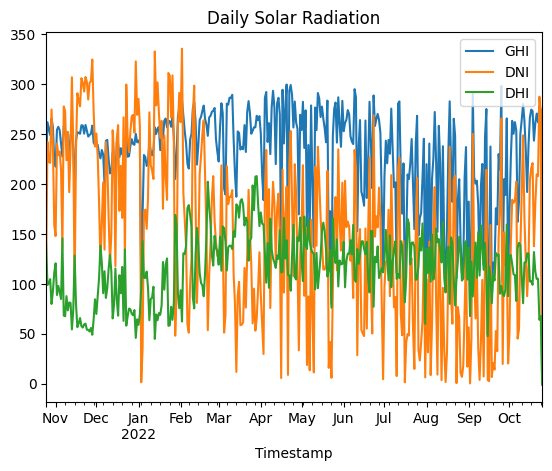

In [6]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Adjust if your time column is named differently
df.set_index('Timestamp').resample('D')[['GHI', 'DNI', 'DHI']].mean().plot()
plt.title('Daily Solar Radiation')
plt.show()


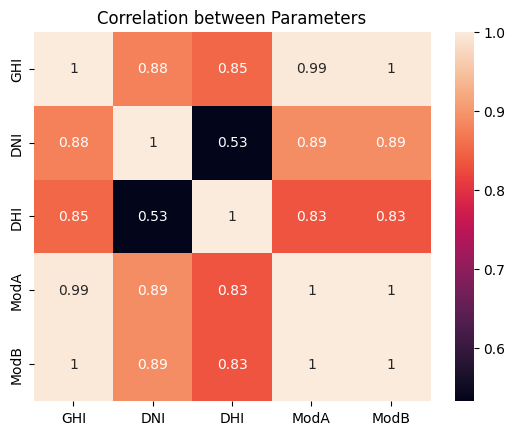

In [7]:
import seaborn as sns

sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)
plt.title("Correlation between Parameters")
plt.show()


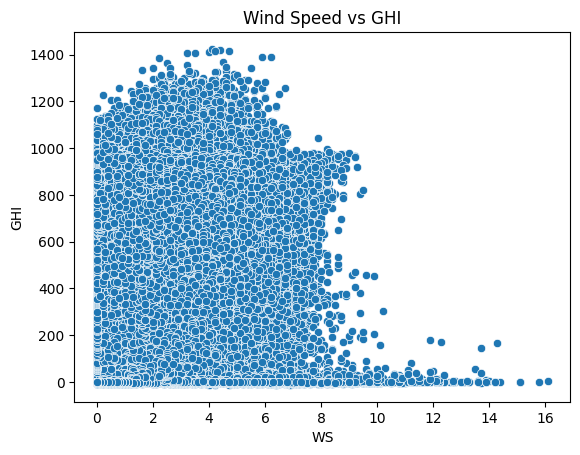

In [8]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()


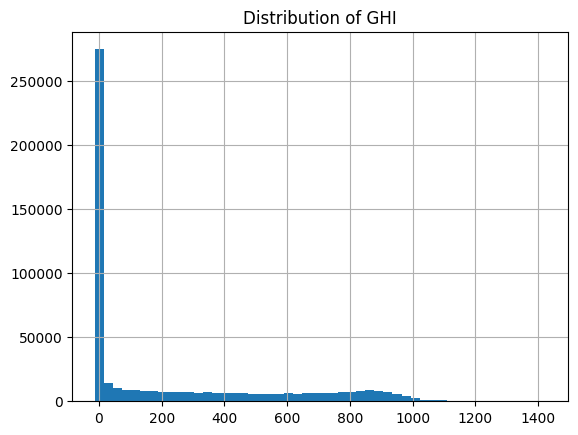

In [9]:
df['GHI'].hist(bins=50)
plt.title("Distribution of GHI")
plt.show()


In [ ]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with RH as bubble size')
plt.show()
